In [1]:
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
sns.set_context('talk')
# Import LISC code
from lisc import Counts
from lisc.utils import save_object, load_object
from lisc.plts.counts import plot_matrix
from lisc.plts.utils import get_cmap
# Import custom project code
import sys
sys.path.append('/home/b1044271/Columbia/bratios')

# Import the Base object used in LISC
from lisc.objects.base import Base

import csv
import json
from pathlib import Path

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from lisc.collect import collect_info, collect_counts
from lisc.plts.utils import get_cmap
from lisc.plts.words import plot_years
from lisc.plts.counts import plot_matrix

import csv
import json
from pathlib import Path

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from lisc.collect import collect_info, collect_counts
from lisc.plts.utils import get_cmap
from lisc.plts.words import plot_years
from lisc.plts.counts import plot_matrix

# Import custom project code
import sys
sys.path.append("/home/b1044271/Columbia/ERPscanr-main/code/")

from plts import plot_year_comparison

In [2]:
db = 'pubmed'

# Set up some terms to search for
terms = [['Motor Learning'], ['Motor Adaptation', 'Motor adaptive', 'Visuomotor adaptation']]
inclusions = [['sleep'], ['sleep']]

# Initialize counts object & add the terms that we want to collect co-occurrences for
counts1 = Counts()
counts1.add_terms(terms)
counts1.add_terms(inclusions, term_type='inclusions')

# Collect co-occurrence data
counts1.run_collection(verbose=True)
X1 = counts1.check_counts()

/home/b1044271/anaconda3/lib/python3.9/site-packages/bs4/builder/__init__.py:545: XMLParsedAsHTMLWarning: It looks like you're parsing an XML document using an HTML parser. If this really is an HTML document (maybe it's XHTML?), you can ignore or filter this warning. If it's XML, you should know that using an XML parser will be more reliable. To parse this document as XML, make sure you have the lxml package installed, and pass the keyword argument `features="xml"` into the BeautifulSoup constructor.
  warnings.warn(


Running counts for:  Motor Learning
Running counts for:  Motor Adaptation
The number of documents found for each search term is:
  'Motor Learning'     -   179
  'Motor Adaptation'   -    26


In [3]:
# Set up some terms to search for
terms = [['Motor Learning'], ['Motor Adaptation', 'Motor adaptive', 'Visuomotor adaptation']]
inclusions1 = [['brain'], ['brain']]

# Initialize counts object & add the terms that we want to collect co-occurrences for
counts2 = Counts()
counts2.add_terms(terms)
counts2.add_terms(inclusions1, term_type='inclusions')

# Collect co-occurrence data
counts2.run_collection(verbose=True)
X2 = counts2.check_counts()

Running counts for:  Motor Learning
Running counts for:  Motor Adaptation
The number of documents found for each search term is:
  'Motor Learning'     -   1635
  'Motor Adaptation'   -    226


In [4]:
# Set up some terms to search for
terms = [['Motor Learning'], ['Motor Adaptation', 'Motor adaptive', 'Visuomotor adaptation']]
inclusions2 = [['brain','sleep'], ['brain','sleep']]

# Initialize counts object & add the terms that we want to collect co-occurrences for
counts3 = Counts()
counts3.add_terms(terms)
counts3.add_terms(inclusions2, term_type='inclusions')

# Collect co-occurrence data
counts3.run_collection(verbose=True)
X3 = counts3.check_counts()

Running counts for:  Motor Learning
Running counts for:  Motor Adaptation
The number of documents found for each search term is:
  'Motor Learning'     -   1763
  'Motor Adaptation'   -    248


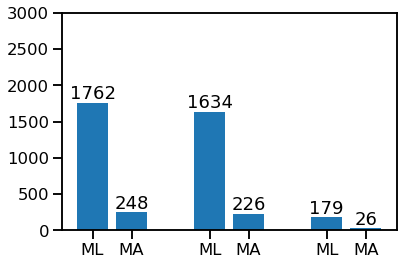

In [10]:
a = plt.bar([1, 2, 4, 5, 7, 8],[1762, 248, 1634, 226,179,26 ], width=0.8, bottom=None, align='center', data=None)
plt.bar_label(a)
plt.xticks([1,2, 4,5 , 7, 8], ['ML', 'MA','ML', 'MA','ML', 'MA'])
plt.ylim(0, 3000)
plt.savefig('Bars.svg', bbox_inches='tight', dpi =500)

In [7]:
start_decade, end_decade = 1990, 2022
decades = list(range(start_decade, end_decade, 10))
    
# Define a list of modalities of interest, with synonyms
modality_terms = [['Motor Learning'], ['Motor Adaptation', 'Motor adaptive', 'Visuomotor adaptation']]

# Define a list of labels to use for the method terms
modality_labels = [lst[0] for lst in modality_terms]

/home/b1044271/anaconda3/lib/python3.9/site-packages/bs4/builder/__init__.py:545: XMLParsedAsHTMLWarning: It looks like you're parsing an XML document using an HTML parser. If this really is an HTML document (maybe it's XHTML?), you can ignore or filter this warning. If it's XML, you should know that using an XML parser will be more reliable. To parse this document as XML, make sure you have the lxml package installed, and pass the keyword argument `features="xml"` into the BeautifulSoup constructor.
  warnings.warn(


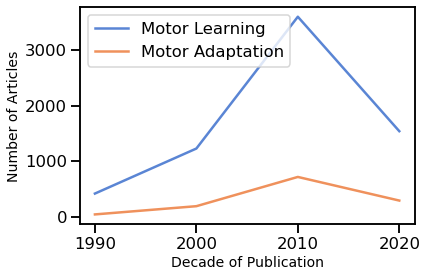

In [11]:
# Notebook settings
SAVE_FIG = False
SAVE_DATA = False
RUN_COLLECTION = True
# Collect information across each decade of interest
if RUN_COLLECTION:
    
    decade_counts = []
    for start_year in decades:

        count, _ = collect_counts(modality_terms,
                                  collect_coocs=False,
                                  mindate=str(start_year) + '/01/01',
                                  maxdate=str(start_year+9) + '/12/31')
        decade_counts.append(count)

    # Convert the collected data into an array, of [n_terms, decade_counts]
    decade_counts = np.array(decade_counts).T
    
    if SAVE_DATA:
        # Save out the collected data for the method counts by decade
        for ind, label in enumerate(modality_labels):
            for decade, count in zip(decades, decade_counts):
                with open(data_dir / 'decades' / (label + '.csv'), 'w') as save_file:
                    for decade, count in zip(decades, decade_counts[ind, :]):
                        save_file.write(str(decade) + ',' + str(count) +'\n')
                        
else:
    decade_counts = []
    for m_term in modality_labels:
        with open(data_dir / 'decades'/ (m_term + '.csv'), 'r') as f_obj:
            count = np.array([row[1] for row in csv.reader(f_obj)], dtype='int')
        decade_counts.append(count)
    decade_counts = np.array(decade_counts)
    
# PLOTTING    
figs_dir = Path('/home/b1044271/Columbia')
data_dir = Path('/home/b1044271/Columbia')

# Plot the popularity of each modality across the decades
plot_year_comparison(decades, decade_counts, modality_labels,
                     save_fig=SAVE_FIG, file_name='modality_decades.pdf', directory=figs_dir)    

plt.savefig('Lines.svg', bbox_inches='tight', dpi =500)